http://deeplearning.net/software/theano/

https://www.tensorflow.org/

# Lesson 1 - theano

In [1]:
import theano
from theano import tensor
# declare two symbolic floating-point scalars
a = tensor.dscalar()
b = tensor.dscalar()
# create a simple expression
c=a+b

In [2]:
# convert the expression into a callable object that takes (a,b) # values as input and computes a value for c
f = theano.function([a,b], c)
# bind 1.5 to 'a', 2.5 to 'b', and evaluate 'c'
result = f(1.5, 2.5)
print(result)

4.0


# Lesson 2 - tensorflow

In [9]:
import tensorflow as tf
# declare two symbolic floating-point scalars
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# create a simple symbolic expression using the add function add = tf.add(a, b)
# bind 1.5 to ' a ' , 2.5 to ' b ' , and evaluate ' c '
add = tf.add(a, b)

In [10]:
sess = tf.Session()
binding = {a: 1.5, b: 2.5}
c = sess.run(add, feed_dict=binding)
print(c)

4.0


From https://www.tensorflow.org/get_started/

0 [ 0.38597038] [ 0.2060585]
20 [ 0.16373493] [ 0.26979229]
40 [ 0.11505215] [ 0.2928659]
60 [ 0.10355483] [ 0.29831517]
80 [ 0.10083956] [ 0.29960209]
100 [ 0.1001983] [ 0.29990602]
120 [ 0.10004682] [ 0.29997781]
140 [ 0.10001106] [ 0.29999477]
160 [ 0.10000263] [ 0.29999876]
180 [ 0.10000063] [ 0.29999971]
200 [ 0.10000017] [ 0.29999992]


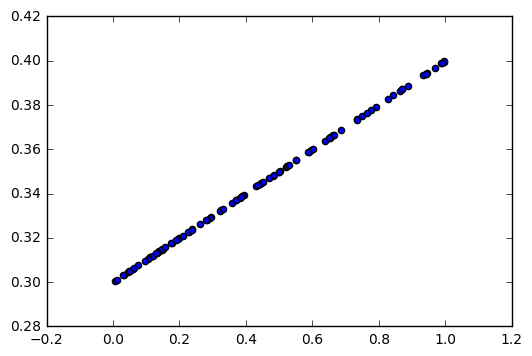

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create 100 phony x, y data points in NumPy, y = x * 0.1 + 0.3
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3
plt.scatter(x_data, y_data)

# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Before starting, initialize the variables.  We will 'run' this first.
init = tf.global_variables_initializer()

# Launch the graph.
sess = tf.Session()
sess.run(init)

# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

# Learns best fit is W: [0.1], b: [0.3]

# Lesson 4 Keras

https://keras.io/

https://keras.io/getting-started/sequential-model-guide/

Indian dataset https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

Attribute Information:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [19]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
seed = 7
numpy.random.seed(seed)
# Load the dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

Using TensorFlow backend.


In [23]:
X = dataset[:,0:8]
Y = dataset[:,8]   # the classification

In [27]:
# Define and Compile
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu')) 
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [28]:
# Fit the model
model.fit(X, Y, nb_epoch=150, batch_size=10)
# Evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
768/768 [==============================] - 0s - loss: 0.6755 - acc: 0.6510     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.6605 - acc: 0.6510     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.6535 - acc: 0.6510     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.6458 - acc: 0.6510     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6353 - acc: 0.6510     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6247 - acc: 0.6510     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6178 - acc: 0.6510     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6134 - acc: 0.6510     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6149 - acc: 0.6510     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6045 - acc: 0.6510     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.6027 - acc

### Ionosphere

https://archive.ics.uci.edu/ml/datasets/Ionosphere
    
Data Set Information:

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere. 

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.


Attribute Information:

-- All 34 are continuous 
-- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task. 

In [4]:
import statsmodels.api as sm

In [6]:
X = np.loadtxt("ionosphere.csv", delimiter=",", usecols=list(range(34)))  # col 35 is ths classification

In [7]:
Y = np.loadtxt("ionosphere.csv", delimiter=",", usecols=[34], dtype=np.str)  # col 35 is ths classification as text string

In [8]:
Y[:5]

array(["b'g'", "b'b'", "b'g'", "b'b'", "b'g'"], 
      dtype='<U4')

In [9]:
Y = sm.tools.categorical(Y, drop=True)  # return a categorial, 

In [10]:
Y[:5]

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [11]:
Y = Y[:,1]

In [12]:
Y[:5]

array([ 1.,  0.,  1.,  0.,  1.])

# Use pandas to read csv and convert categorical to number using get_dummies

In [14]:
import pandas as pd
data_pandas = pd.read_csv("ionosphere.csv")

In [17]:
data_pandas['g'].head()

0    b
1    g
2    b
3    g
4    b
Name: g, dtype: object

In [18]:
data_categorical = pd.get_dummies(data_pandas['g'])

In [20]:
data_categorical['b']

0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
5      0.0
6      1.0
7      0.0
8      1.0
9      0.0
10     1.0
11     0.0
12     1.0
13     0.0
14     1.0
15     0.0
16     1.0
17     0.0
18     1.0
19     0.0
20     1.0
21     0.0
22     1.0
23     0.0
24     1.0
25     0.0
26     1.0
27     0.0
28     1.0
29     0.0
      ... 
320    0.0
321    0.0
322    0.0
323    0.0
324    0.0
325    0.0
326    0.0
327    0.0
328    0.0
329    0.0
330    0.0
331    0.0
332    0.0
333    0.0
334    0.0
335    0.0
336    0.0
337    0.0
338    0.0
339    0.0
340    0.0
341    0.0
342    0.0
343    0.0
344    0.0
345    0.0
346    0.0
347    0.0
348    0.0
349    0.0
Name: b, dtype: float64

In [118]:
model = Sequential()
model.add(Dense(12, input_dim=34, init='uniform', activation='relu')) 
model.add(Dense(34, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [119]:
# Fit the model
model.fit(X, Y, nb_epoch=150, batch_size=10)
# Evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
351/351 [==============================] - 0s - loss: 0.6882 - acc: 0.6638     
Epoch 2/150
351/351 [==============================] - 0s - loss: 0.6478 - acc: 0.6553     
Epoch 3/150
351/351 [==============================] - 0s - loss: 0.5523 - acc: 0.7464     
Epoch 4/150
351/351 [==============================] - 0s - loss: 0.4560 - acc: 0.8575     
Epoch 5/150
351/351 [==============================] - 0s - loss: 0.3705 - acc: 0.8775     
Epoch 6/150
351/351 [==============================] - 0s - loss: 0.3106 - acc: 0.9031     
Epoch 7/150
351/351 [==============================] - 0s - loss: 0.2681 - acc: 0.9088     
Epoch 8/150
351/351 [==============================] - 0s - loss: 0.2398 - acc: 0.9145     
Epoch 9/150
351/351 [==============================] - 0s - loss: 0.2183 - acc: 0.9231     
Epoch 10/150
351/351 [==============================] - 0s - loss: 0.1952 - acc: 0.9316     
Epoch 11/150
351/351 [==============================] - 0s - loss: 0.1764 - acc

In [131]:
history = model.fit(X, Y, nb_epoch=150, batch_size=10)
print(history.history.keys())

AttributeError: 'Sequential' object has no attribute 'history'

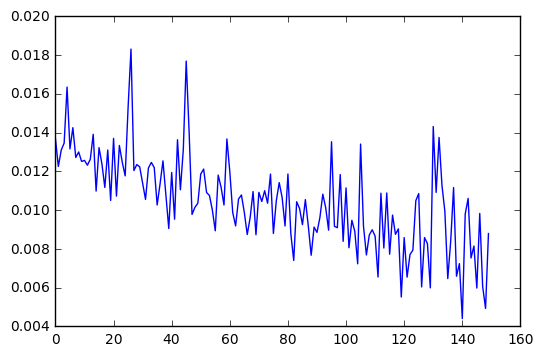

In [130]:
plt.plot(history.history['loss'])

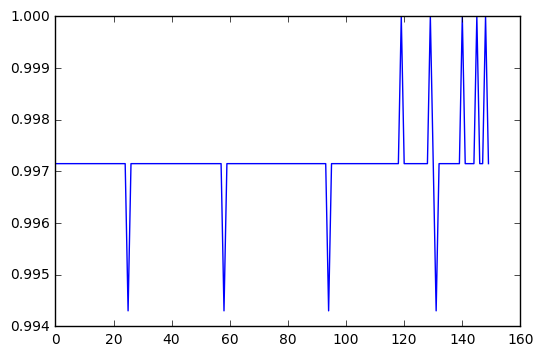

In [129]:
plt.plot(history.history['acc'])

In [124]:
?a